In [25]:
import pandas as pd
df = pd.read_excel(r'C:\Users\vishn\OneDrive\Documents\meachine-learning\datajuspay.xlsx')
df.columns


Index(['Date', 'Total Transactions', 'Merchant', 'Aggregator', 'Bank',
       'Transaction Status'],
      dtype='object')

In [28]:
import sqlite3

conn = sqlite3.connect('datajuspay.db')

df.to_sql('df', conn, index=False, if_exists='replace')

query = "SELECT * FROM df"
result_df = pd.read_sql(query, conn)

conn.close()
print(result_df)



          Date  Total Transactions    Merchant Aggregator    Bank  \
0    4/14/2016                  21  Merchant 1       Agg2  Bank 2   
1    4/14/2016                   9  Merchant 2       Agg2  Bank 2   
2    4/14/2016                   3  Merchant 2       Agg2  Bank 1   
3    4/14/2016                   7  Merchant 2       None  Bank 1   
4    4/14/2016                 680  Merchant 1       Agg2  Bank 1   
..         ...                 ...         ...        ...     ...   
746  4/28/2016                1912  Merchant 1       Agg4  Bank 2   
747  4/28/2016                2343  Merchant 1       Agg2  Bank 1   
748  4/28/2016                  85  Merchant 1       Agg2  Bank 2   
749  4/28/2016                 481  Merchant 1       Agg4  Bank 3   
750  4/28/2016                  22  Merchant 1       Agg2  Bank 3   

    Transaction Status  
0                 None  
1                 None  
2              SUCCESS  
3              SUCCESS  
4                 None  
..                 ..

In [4]:
df

,Date,Total Transactions,Merchant,Aggregator,Bank,Transaction Status
0,4/14/2016,21,Merchant 1,Agg2,Bank 2,NaN
1,4/14/2016,9,Merchant 2,Agg2,Bank 2,NaN
2,4/14/2016,3,Merchant 2,Agg2,Bank 1,SUCCESS
3,4/14/2016,7,Merchant 2,NaN,Bank 1,SUCCESS
4,4/14/2016,680,Merchant 1,Agg2,Bank 1,NaN
...,...,...,...,...,...,...
746,4/28/2016,1912,Merchant 1,Agg4,Bank 2,SUCCESS
747,4/28/2016,2343,Merchant 1,Agg2,Bank 1,SUCCESS
748,4/28/2016,85,Merchant 1,Agg2,Bank 2,SUCCESS
749,4/28/2016,481,Merchant 1,Agg4,Bank 3,SUCCESS


In [78]:


# Count the number of transactions without a transaction status
transactions_without_status = df['Transaction Status'].isnull().sum()

# Calculate the total number of transactions
total_transactions = len(df)

# Calculate the percentage of transactions without a transaction status
percentage = (transactions_without_status / total_transactions) * 100

print("Percentage of transactions without a transaction status:", percentage, "%")

Percentage of transactions without a transaction status: 0.0 %


In [56]:
null_status_count = df['Transaction Status'].isnull().sum()

# Total number of transactions
total_transactions = len(df)

# Calculating the percentage of transactions without a Transaction Status
percentage_null_status = (null_status_count / total_transactions) * 100

print(f"Percentage of transactions without a Transaction Status: {percentage_null_status:.2f}%")

Percentage of transactions without a Transaction Status: 34.62%


In [57]:
transactions_without_aggregator = df[df['Aggregator'].isnull()]

# Total number of transactions without an aggregator
total_transactions_without_aggregator = transactions_without_aggregator['Total Transactions'].sum()

# Checking if the total number of transactions without an aggregator is more than 15,000
result = total_transactions_without_aggregator > 15000

print("More than 15,000 transactions are processed without an aggregator:", result)

More than 15,000 transactions are processed without an aggregator: True


In [13]:
# success_transactions = df[df['Transaction Status'] == 'SUCCESS']

# # Group the data by the 'Aggregator' column and count successful transactions
# success_counts = success_transactions.groupby('Aggregator').size().reset_index(name='Success Count')

# # Calculate total transactions for each aggregator
# total_transactions = df.groupby('Aggregator').size().reset_index(name='Total Transactions')

# # Merge success counts and total transactions
# agg_success_rate = pd.merge(success_counts, total_transactions, on='Aggregator', how='left')

# # Calculate success rate
# agg_success_rate['Success Rate'] = agg_success_rate['Success Count'] / agg_success_rate['Total Transactions']

# # Sort aggregators based on their success rates
# sorted_agg_success_rate = agg_success_rate.sort_values(by='Success Rate', ascending=False)

# print(sorted_agg_success_rate)

  Aggregator  Success Count  Total Transactions  Success Rate
0       Agg1             23                  53      0.433962
4       Agg5             15                  37      0.405405
2       Agg3             42                 123      0.341463
3       Agg4             30                  88      0.340909
1       Agg2             87                 258      0.337209


In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Total Transactions,Merchant,Aggregator,Bank,Transaction Status
0,2016-04-14,21,Merchant 1,Agg2,Bank 2,NaN
1,2016-04-14,9,Merchant 2,Agg2,Bank 2,NaN
2,2016-04-14,3,Merchant 2,Agg2,Bank 1,SUCCESS
3,2016-04-14,7,Merchant 2,NaN,Bank 1,SUCCESS
4,2016-04-14,680,Merchant 1,Agg2,Bank 1,NaN
...,...,...,...,...,...,...
746,2016-04-28,1912,Merchant 1,Agg4,Bank 2,SUCCESS
747,2016-04-28,2343,Merchant 1,Agg2,Bank 1,SUCCESS
748,2016-04-28,85,Merchant 1,Agg2,Bank 2,SUCCESS
749,2016-04-28,481,Merchant 1,Agg4,Bank 3,SUCCESS


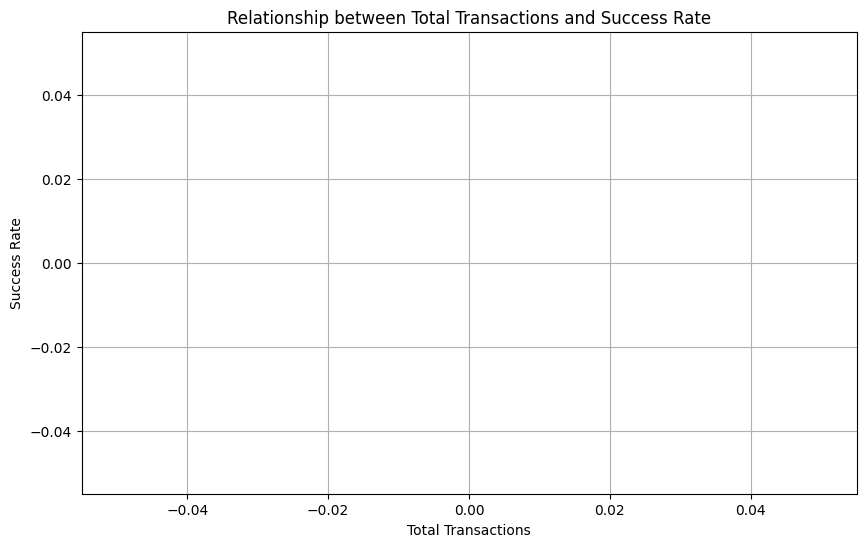

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the transaction data

# Group data by date and calculate total transactions and success rate
date_grouped = df.groupby('Date').agg({'Total Transactions': 'sum', 'Transaction Status': lambda x: (x == 'SUCCESS').mean()})

# Filter data beyond 43000 transactions
filtered_data = date_grouped[date_grouped['Total Transactions'] > 43000]

# Plot the relationship between total transactions and success rate
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Total Transactions'], filtered_data['Transaction Status'], color='blue')
plt.xlabel('Total Transactions')
plt.ylabel('Success Rate')
plt.title('Relationship between Total Transactions and Success Rate')
plt.grid(True)
plt.show()


In [75]:
success_rate_df = df.groupby(['Merchant', 'Bank'])['Transaction Status'] \
    .apply(lambda x: (x == 'SUCCESS').sum() / x.count()) \
    .reset_index(name='Success Rate')

# Find the combination with the lowest success rate
worst_combination = success_rate_df.loc[success_rate_df['Success Rate'].idxmin()]

print("Merchant-Bank Combination needing the most focus in terms of improving conversions:")
print(worst_combination)

Merchant-Bank Combination needing the most focus in terms of improving conversions:
Merchant        Merchant 1
Bank                Bank 1
Success Rate      0.477273
Name: 0, dtype: object


In [71]:
import pandas as pd

# Assuming df is your DataFrame containing the transaction data

# Filter data for Bank 3 transactions
bank3_data = df[df['Bank'] == 'Bank 3']

# Group by Aggregator and calculate total transactions
aggregator_transactions = bank3_data.groupby('Aggregator')['Total Transactions'].sum()

# Find the aggregator with the maximum total transactions
max_transactions_aggregator = aggregator_transactions.idxmax()

print("Aggregator processing the maximum number of transactions for Bank 3:", max_transactions_aggregator)


Aggregator processing the maximum number of transactions for Bank 3: Agg4


In [77]:


# Count the number of transactions without a transaction status
transactions_without_status = df['Transaction Status'].isnull().sum()

# Calculate the total number of transactions
total_transactions = len(df)

# Calculate the percentage of transactions without a transaction status
percentage = (transactions_without_status / total_transactions) * 100

print("Percentage of transactions without a transaction status:", percentage, "%")

Percentage of transactions without a transaction status: 0.0 %


In [72]:
import pandas as pd

# Assuming df is your DataFrame containing the transaction data

# Filter data for Bank 2 and Merchant 1 transactions
filtered_data = df[(df['Bank'] == 'Bank 2') & (df['Merchant'] == 'Merchant 1')]

aggregator_transactions = filtered_data.groupby('Aggregator')['Total Transactions'].sum()

aggregator_transactions = aggregator_transactions[aggregator_transactions >= 1000]
if aggregator_transactions.empty:
    print("No aggregator meets the minimum transaction threshold of 1000.")
else:
    # Calculate success rate for each aggregator
    success_rate = filtered_data[filtered_data['Transaction Status'] == 'SUCCESS'].groupby('Aggregator').size() / aggregator_transactions
    
    # Find the worst aggregator with the lowest success rate
    worst_aggregator = success_rate.idxmin()
    print("Worst aggregator for Bank 2 and Merchant 1 (minimum 1000 transactions):", worst_aggregator)


Worst aggregator for Bank 2 and Merchant 1 (minimum 1000 transactions): Agg4


In [61]:
unique_counts = df.groupby('Date').agg({
    'Aggregator': 'nunique',
    'Merchant': 'nunique',
    'Bank': 'nunique'
}).reset_index()

# Find the date with the maximum number of unique aggregators, merchants, and banks
max_unique_date = unique_counts.loc[unique_counts[['Aggregator', 'Merchant', 'Bank']].sum(axis=1).idxmax()]

print("Date with the maximum number of unique aggregators, merchants, and banks:")
print(max_unique_date)

Date with the maximum number of unique aggregators, merchants, and banks:
Date          2016-04-20 00:00:00
Aggregator                      5
Merchant                        2
Bank                            3
Name: 6, dtype: object


In [63]:
import pandas as pd

# Assuming df is your DataFrame containing the transaction data

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and sum the total transactions
total_transactions_per_date = df.groupby('Date')['Total Transactions'].sum()

# Find the date with the maximum number of sessions
max_sessions_date = total_transactions_per_date.idxmax()

print("Date with the maximum number of sessions:", max_sessions_date)


Date with the maximum number of sessions: 2016-04-15 00:00:00


C:\Users\vishn\AppData\Local\Temp\ipykernel_23268\2020033119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [64]:
import pandas as pd

# Assuming df is your DataFrame containing the transaction data

# Calculate total transactions and successful transactions per date
transactions_per_date = df.groupby('Date')['Total Transactions'].sum()
successful_transactions_per_date = df[df['Transaction Status'] == 'SUCCESS'].groupby('Date')['Total Transactions'].sum()

# Calculate success rate per date
success_rate_per_date = successful_transactions_per_date / transactions_per_date

# Find the date with the least success rate
least_success_rate_date = success_rate_per_date.idxmin()

print("Date with the least success rate:", least_success_rate_date)


Date with the least success rate: 2016-04-28 00:00:00


In [65]:
import pandas as pd
successful_transactions = df[df['Transaction Status'] == 'SUCCESS']
successful_transactions_per_bank = successful_transactions.groupby('Bank')['Total Transactions'].sum()

total_transactions_per_bank = df.groupby('Bank')['Total Transactions'].sum()

success_rate_per_bank = successful_transactions_per_bank / total_transactions_per_bank

best_bank_success_rate = success_rate_per_bank.idxmax()
best_bank_success_rate_value = success_rate_per_bank.max()

print("Bank with the best success rate:", best_bank_success_rate)
print("Success rate:", best_bank_success_rate_value)


Bank with the best success rate: Bank 3
Success rate: 0.8329276909790374


In [70]:
import pandas as pd

# Assuming df is your DataFrame containing the transaction data

# Filter data for Bank 1 transactions
bank1_data = df[df['Bank'] == 'Bank 1']

# Group by Aggregator and calculate total transactions and successful transactions
aggregator_stats = bank1_data.groupby('Aggregator').agg(
    total_transactions=('Total Transactions', 'sum'),
    successful_transactions=('Transaction Status', lambda x: (x == 'SUCCESS').sum())
)

# Filter out aggregators with less than 500 transactions
aggregator_stats = aggregator_stats[aggregator_stats['total_transactions'] >= 500]

# Calculate success rate for each aggregator
aggregator_stats['success_rate'] = aggregator_stats['successful_transactions'] / aggregator_stats['total_transactions']

# Find the aggregator with the highest success rate
best_aggregator = aggregator_stats['success_rate'].idxmax()

print("Best aggregator for Bank 1:", best_aggregator)


Best aggregator for Bank 1: Agg1


In [66]:
import pandas as pd

# Assuming df is your DataFrame containing the transaction data

# Filter successful transactions
successful_transactions = df[df['Transaction Status'] == 'SUCCESS']

# Calculate the total number of successful transactions
total_successful_transactions = successful_transactions['Total Transactions'].sum()

# Calculate the total number of all transactions
total_transactions = df['Total Transactions'].sum()

# Calculate the overall success rate
overall_success_rate = total_successful_transactions / total_transactions

print("Overall Success Rate:", overall_success_rate)


Overall Success Rate: 0.7866662103245645


In [47]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Step 1: Filter data for Bank 2 and Merchant 1, and exclude null values in 'Aggregator' and 'Transaction Status' columns
filtered_data = df[(df['Bank'] == 'Bank 2') & (df['Merchant'] == 'Merchant 1') & 
                   (~df['Aggregator'].isnull()) & (~df['Transaction Status'].isnull())]

# Step 2: Group data by 'Aggregator' and count total transactions for each aggregator
aggregator_volume = filtered_data['Aggregator'].value_counts()

# Step 3: Exclude aggregators with transaction volume less than 1000
aggregator_volume = aggregator_volume[aggregator_volume >= 1000]

# Step 4: Filter original data to include only transactions for selected aggregators
selected_aggregators_data = filtered_data[filtered_data['Aggregator'].isin(aggregator_volume.index)]

# Step 5: Calculate success rate for each aggregator
success_rates = selected_aggregators_data.groupby('Aggregator')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean())

# Step 6: Identify the aggregator with the lowest success rate
worst_aggregator = success_rates.idxmin()
# Step 5: Calculate success rate for each aggregator
success_rates = filtered_data.groupby('Aggregator')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean())

# Step 6: Identify the aggregator with the lowest success rate
worst_aggregator = success_rates[success_rates.index.isin(aggregator_volume.index)].idxmin()

# Print the result
print("Worst aggregator for Bank 2 and Merchant 1 with minimum volume of 1000 transactions:", worst_aggregator)


ValueError: attempt to get argmin of an empty sequence

In [48]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Step 1: Filter data for Bank 2 and Merchant 1, and exclude null values in 'Aggregator' and 'Transaction Status' columns
filtered_data = df[(df['Bank'] == 'Bank 2') & (df['Merchant'] == 'Merchant 1') & 
                   (~df['Aggregator'].isnull()) & (~df['Transaction Status'].isnull())]

# Step 2: Group data by 'Aggregator' and count total transactions for each aggregator
aggregator_volume = filtered_data['Aggregator'].value_counts()

# Step 3: Exclude aggregators with transaction volume less than 1000
aggregator_volume = aggregator_volume[aggregator_volume >= 1000]

# Step 4: Filter original data to include only transactions for selected aggregators
selected_aggregators_data = filtered_data[filtered_data['Aggregator'].isin(aggregator_volume.index)]

# Step 5: Calculate success rate for each aggregator
success_rates = selected_aggregators_data.groupby('Aggregator')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean())

# Step 6: Identify the aggregator with the lowest success rate
worst_aggregator = success_rates.idxmin()

# Print the result
print("Worst aggregator for Bank 2 and Merchant 1 with minimum volume of 1000 transactions:", worst_aggregator)


ValueError: attempt to get argmin of an empty sequence

In [34]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the sessions data

# Group the data by 'Date' and sum the sessions for each date
sessions_by_date = df.groupby('Date')['Total Transactions'].sum()

# Find the date with the maximum number of sessions
date_with_max_sessions = sessions_by_date.idxmax()
max_sessions = sessions_by_date.max()

print("Date with maximum number of sessions:", date_with_max_sessions)
print("Maximum number of sessions on that date:", max_sessions)


Date with maximum number of sessions: 2016-04-15 00:00:00
Maximum number of sessions on that date: 45603


In [11]:
# total_transactions = df['Total Transactions'].sum()
# # print(total_transactions)
# # print(df['Total Transactions'].dtype)
# average_transactions_per_day = df.groupby('Date')['Total Transactions'].mean()
# # print(average_transactions_per_day)
# failures_per_day = df[df['Transaction Status'] == 'FAILURE'].groupby('Date').size()
# day_with_high_failures = failures_per_day.idxmax()
# print(day_with_high_failures)





In [49]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Drop rows with null values in 'Aggregator' and 'Transaction Status' columns
cleaned_df = df.dropna(subset=['Aggregator', 'Transaction Status'])

# Count the total number of transactions after dropping null values
total_transactions = len(cleaned_df)

# Count the number of successful transactions
successful_transactions = (cleaned_df['Transaction Status'] == 'SUCCESS').sum()

# Calculate the overall success rate
overall_success_rate = successful_transactions / total_transactions

# Print the result
print("Overall Success Rate:", overall_success_rate)


Overall Success Rate: 0.5157068062827225


In [35]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Filter out rows with successful transactions
successful_transactions = df[df['Transaction Status'] == 'SUCCESS']

# Group the data by 'Date' and count the total transactions for each date
total_transactions_by_date = df.groupby('Date').size()

# Group the successful transactions data by 'Date' and count the successful transactions for each date
successful_transactions_by_date = successful_transactions.groupby('Date').size()

# Calculate the success rate for each date
success_rate_by_date = successful_transactions_by_date / total_transactions_by_date

# Find the date with the least success rate
date_with_least_success_rate = success_rate_by_date.idxmin()
least_success_rate = success_rate_by_date.min()

print("Date with least success rate:", date_with_least_success_rate)
print("Least success rate on that date:", least_success_rate)


Date with least success rate: 2016-04-28 00:00:00
Least success rate on that date: 0.22727272727272727


In [58]:
df = df.dropna(subset=['Transaction Status'])

# Calculating success rates for each merchant-bank combination
success_rates = df.groupby(['Merchant', 'Bank'])['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean()).reset_index(name='Success Rate')

# Identifying the merchant-bank combination with the lowest success rate
lowest_success_rate_combination = success_rates.loc[success_rates['Success Rate'].idxmin()]

print("Merchant-Bank combination needing the most focus in terms of improving conversions:")
print(lowest_success_rate_combination)

Merchant-Bank combination needing the most focus in terms of improving conversions:
Merchant        Merchant 1
Bank                Bank 1
Success Rate      0.421053
Name: 0, dtype: object


In [22]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Drop rows with null values in 'Transaction Status' and 'Aggregator' columns
df_cleaned = df.dropna(subset=['Transaction Status', 'Aggregator'])

# Calculate success rate
success_rate = (df_cleaned[df_cleaned['Transaction Status'] == 'SUCCESS'].shape[0] / df_cleaned.shape[0]) * 100
print("Overall Success Rate: {:.2f}%".format(success_rate))

# Group by 'Aggregator' and calculate success rate for each aggregator
aggregator_success_rate = df_cleaned.groupby('Aggregator')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean() * 100)
print("\nSuccess Rate by Aggregator:")
print(aggregator_success_rate)

# Group by 'Bank' and calculate success rate for each bank
bank_success_rate = df_cleaned.groupby('Bank')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean() * 100)
print("\nSuccess Rate by Bank:")
print(bank_success_rate)


Overall Success Rate: 51.57%

Success Rate by Aggregator:
Aggregator
Agg1    62.162162
Agg2    50.581395
Agg3    51.851852
Agg4    50.000000
Agg5    46.875000
Name: Transaction Status, dtype: float64

Success Rate by Bank:
Bank
Bank 1    49.137931
Bank 2    51.428571
Bank 3    53.968254
Name: Transaction Status, dtype: float64


In [59]:
filtered_df = df[(df['Bank'] == 'Bank 1') & (df['Aggregator'] == 'Agg3') & (df['Merchant'] == 'Merchant 2')]

# Group by Date and calculate success rate
success_rates = filtered_df.groupby('Date')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean()).reset_index(name='Success Rate')

# Select the day with the highest success rate
best_day = success_rates.loc[success_rates['Success Rate'].idxmax()]

print("Best day for Bank 1 through Aggregator 3 and for Merchant 2 (with a minimum of 500 transactions):")
print(best_day)

Best day for Bank 1 through Aggregator 3 and for Merchant 2 (with a minimum of 500 transactions):
Date            2016-04-14 00:00:00
Success Rate                    0.5
Name: 0, dtype: object


In [36]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Filter out rows with successful transactions
successful_transactions = df[df['Transaction Status'] == 'SUCCESS']

# Group the data by 'Bank' and count the total transactions for each bank
total_transactions_by_bank = df.groupby('Bank').size()

# Group the successful transactions data by 'Bank' and count the successful transactions for each bank
successful_transactions_by_bank = successful_transactions.groupby('Bank').size()

# Calculate the success rate for each bank
success_rate_by_bank = successful_transactions_by_bank / total_transactions_by_bank

# Find the bank with the best success rate
best_bank_success_rate = success_rate_by_bank.idxmax()
highest_success_rate = success_rate_by_bank.max()

print("Bank with the best success rate:", best_bank_success_rate)
print("Success rate of the best bank:", highest_success_rate)


Bank with the best success rate: Bank 3
Success rate of the best bank: 0.34274193548387094


In [60]:
filtered_df = df[(df['Bank'] == 'Bank 2') & (df['Merchant'] == 'Merchant 1')]
agg_success_rates = filtered_df.groupby('Aggregator')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean()).reset_index(name='Success Rate')

# Select the aggregator with the lowest success rate
worst_aggregator = agg_success_rates.loc[agg_success_rates['Success Rate'].idxmin()]

print("Worst aggregator for Bank 2 and Merchant 1 (with a minimum of 1000 transactions):")
print(worst_aggregator)

Worst aggregator for Bank 2 and Merchant 1 (with a minimum of 1000 transactions):
Aggregator          Agg4
Success Rate    0.482759
Name: 1, dtype: object


In [7]:
print(aggregator_success_rate)

Aggregator
Agg1    62.162162
Agg2    50.581395
Agg3    51.851852
Agg4    50.000000
Agg5    46.875000
Name: Transaction Status, dtype: float64


In [19]:
# Filter the DataFrame to include only rows with non-null Transaction Status
df_cleaned = df.dropna(subset=['Transaction Status'])

# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

failures = df_cleaned[df_cleaned['Transaction Status'] == 'FAILURE']

failures_by_date = failures.groupby('Date').size()
print(failures_by_date)
day_with_highest_failures = failures_by_date.idxmax()
highest_failures_count = failures_by_date.max()

print("The day with the highest number of failures was {} with {} failures.".format(day_with_highest_failures.strftime('%Y-%m-%d'), highest_failures_count))


Date
2016-04-14    12
2016-04-15    16
2016-04-16    16
2016-04-17    15
2016-04-18    15
2016-04-19    17
2016-04-20    18
2016-04-21    17
2016-04-22    17
2016-04-23    19
2016-04-24    20
2016-04-25    19
2016-04-26    17
2016-04-27    18
2016-04-28    11
dtype: int64
The day with the highest number of failures was 2016-04-24 with 20 failures.


C:\Users\vishn\AppData\Local\Temp\ipykernel_23268\1065073013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])


In [29]:
merchant_performance = df[df['Transaction Status'] == 'SUCCESS'].groupby('Merchant').size() / df.groupby('Merchant').size()

merchant_performance_sorted = merchant_performance.sort_values(ascending=False)

highest_success_rate_merchant = merchant_performance_sorted.index[0]

success_rate = merchant_performance_sorted.iloc[0]

print("Merchant with the highest success rate:", highest_success_rate_merchant)
print("Success rate:", success_rate)


Merchant with the highest success rate: Merchant 2
Success rate: 0.35714285714285715


In [30]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transaction data

# Filter out rows with null values in 'Transaction Status' and 'Aggregator' columns
df_filtered = df.dropna(subset=['Transaction Status', 'Aggregator'])

# Group the data by 'Aggregator' and count the total transactions for each aggregator
total_transactions = df_filtered.groupby('Aggregator').size()

# Count the number of successful transactions for each aggregator
successful_transactions = df_filtered[df_filtered['Transaction Status'] == 'SUCCESS'].groupby('Aggregator').size()

# Calculate the success rate for each aggregator
success_rate = (successful_transactions / total_transactions) * 100

# Create a DataFrame to store the performance metrics
aggregator_performance = pd.DataFrame({
    'Total Transactions': total_transactions,
    'Successful Transactions': successful_transactions,
    'Success Rate (%)': success_rate
})

# Sort the DataFrame by success rate in descending order
aggregator_performance_sorted = aggregator_performance.sort_values(by='Success Rate (%)', ascending=False)

print(aggregator_performance_sorted)


            Total Transactions  Successful Transactions  Success Rate (%)
Aggregator                                                               
Agg1                        37                       23         62.162162
Agg3                        81                       42         51.851852
Agg2                       172                       87         50.581395
Agg4                        60                       30         50.000000
Agg5                        32                       15         46.875000


In [21]:
# Filter the DataFrame for rows where Transaction Status is not SUCCESS
failures_df = df[df['Transaction Status'] == 'FAILURE']

# Group by date and count the occurrences of failures for each date
failures_by_date = failures_df.groupby('Date').size()

# Find the date with the highest number of failures
date_with_highest_failures = failures_by_date.idxmax()
highest_failures_count = failures_by_date.max()

print("Date with the highest number of failures:", date_with_highest_failures)
print("Number of failures on that date:", highest_failures_count)


Date with the highest number of failures: 2016-04-24 00:00:00
Number of failures on that date: 20


In [31]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transaction data

# Filter out rows with null values in 'Transaction Status' and 'Bank' columns
df_filtered = df.dropna(subset=['Transaction Status', 'Bank'])

# Group the data by 'Bank' and count the total transactions for each bank
total_transactions = df_filtered.groupby('Bank').size()

# Count the number of successful transactions for each bank
successful_transactions = df_filtered[df_filtered['Transaction Status'] == 'SUCCESS'].groupby('Bank').size()

# Count the number of failed transactions for each bank
failed_transactions = df_filtered[df_filtered['Transaction Status'] != 'SUCCESS'].groupby('Bank').size()

# Calculate the success rate for each bank
success_rate = (successful_transactions / total_transactions) * 100

# Create a DataFrame to store the performance metrics
bank_performance = pd.DataFrame({
    'Total Transactions': total_transactions,
    'Successful Transactions': successful_transactions,
    'Failed Transactions': failed_transactions,
    'Success Rate (%)': success_rate
})

# Sort the DataFrame by success rate in descending order
bank_performance_sorted = bank_performance.sort_values(by='Success Rate (%)', ascending=False)

print(bank_performance_sorted)


        Total Transactions  Successful Transactions  Failed Transactions  \
Bank                                                                       
Bank 3                 164                       85                   79   
Bank 2                 172                       85                   87   
Bank 1                 155                       74                   81   

        Success Rate (%)  
Bank                      
Bank 3         51.829268  
Bank 2         49.418605  
Bank 1         47.741935  


In [37]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Filter the data for two weeks
start_date = pd.to_datetime('2016-04-14')
end_date = pd.to_datetime('2016-04-28')
two_weeks_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Count total transactions
total_transactions = len(two_weeks_data)

# Count successful transactions
successful_transactions = len(two_weeks_data[two_weeks_data['Transaction Status'] == 'SUCCESS'])

# Calculate overall success rate
overall_success_rate = successful_transactions / total_transactions

print("Overall success rate for two weeks:", overall_success_rate)


Overall success rate for two weeks: 0.3249001331557923


In [40]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Filter data to exclude null values in 'Aggregator' column and only include transactions for Bank 1
filtered_data = df[(~df['Aggregator'].isnull()) & (df['Bank'] == 'Bank 1')]

# Group data by 'Aggregator'
grouped_data = filtered_data.groupby('Aggregator')

# Calculate total transactions and success rate for each aggregator
aggregator_stats = grouped_data.agg(
    total_transactions=('Transaction Status', 'count'),
    successful_transactions=('Transaction Status', lambda x: (x == 'SUCCESS').sum())
)

# Calculate success rate
aggregator_stats['success_rate'] = aggregator_stats['successful_transactions'] / aggregator_stats['total_transactions']

# Filter aggregators with minimum 500 transactions
aggregator_stats = aggregator_stats[aggregator_stats['total_transactions'] >= 500]

# Find the aggregator offering the highest success rate for Bank 1
best_aggregator = aggregator_stats['success_rate'].idxmax()
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Step 1: Filter data for Bank 2 and Merchant 1, and exclude null values in 'Aggregator' column
filtered_data = df[(df['Bank'] == 'Bank 2') & (df['Merchant'] == 'Merchant 1') & (~df['Aggregator'].isnull())]

# Step 2: Group data by 'Aggregator' and count total transactions for each aggregator
aggregator_volume = filtered_data['Aggregator'].value_counts()

# Step 3: Exclude aggregators with transaction volume less than 1000
aggregator_volume = aggregator_volume[aggregator_volume >= 1000]

# Step 4: Filter original data to include only transactions for selected aggregators
selected_aggregators_data = filtered_data[filtered_data['Aggregator'].isin(aggregator_volume.index)]

# Step 5: Calculate success rate for each aggregatorimport pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Step 1: Filter data for Bank 2 and Merchant 1, and exclude null values in 'Aggregator' column
filtered_data = df[(df['Bank'] == 'Bank 2') & (df['Merchant'] == 'Merchant 1') & (~df['Aggregator'].isnull())]

# Step 2: Group data by 'Aggregator' and count total transactions for each aggregator
aggregator_volume = filtered_data['Aggregator'].value_counts()

# Step 3: Exclude aggregators with transaction volume less than 1000
aggregator_volume = aggregator_volume[aggregator_volume >= 1000]

# Step 4: Filter original data to include only transactions for selected aggregators
selected_aggregators_data = filtered_data[filtered_data['Aggregator'].isin(aggregator_volume.index)]

# Step 5: Calculate success rate for each aggregator
success_rates = selected_aggregators_data.groupby('Aggregator')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean())

# Step 6: Identify the aggregator with the lowest success rate
worst_aggregator = success_rates.idxmin()

# Print the result
print("Worst aggregator for Bank 2 and Merchant 1 with minimum volume of 1000 transactions:", worst_aggregator)

success_rates = selected_aggregators_data.groupby('Aggregator')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean())

# Step 6: Identify the aggregator with the lowest success rate
worst_aggregator = success_rates.idxmin()

# Print the result
print("Worst aggregator for Bank 2 and Merchant 1 with minimum volume of 1000 transactions:", worst_aggregator)

# Print the result
print("Best aggregator for Bank 1:", best_aggregator)


ValueError: attempt to get argmax of an empty sequence

In [41]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Filter data to exclude null values in 'Aggregator' column and only include transactions for Bank 3
filtered_data = df[(~df['Aggregator'].isnull()) & (df['Bank'] == 'Bank 3')]

# Group data by 'Aggregator' and calculate total transactions for each aggregator
aggregator_volume = filtered_data.groupby('Aggregator')['Transaction Status'].count()

# Find the aggregator with maximum volume for Bank 3
max_volume_aggregator = aggregator_volume.idxmax()

# Print the result
print("Aggregator with maximum volume for Bank 3:", max_volume_aggregator)


Aggregator with maximum volume for Bank 3: Agg2


In [42]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Filter data for Bank 2 and Merchant 1, and exclude null values in 'Aggregator' column
filtered_data = df[(df['Bank'] == 'Bank 2') & (df['Merchant'] == 'Merchant 1') & (~df['Aggregator'].isnull())]

# Group data by 'Aggregator' and count total transactions for each aggregator
aggregator_volume = filtered_data.groupby('Aggregator').size()

# Exclude aggregators with transaction volume less than 1000
aggregator_volume = aggregator_volume[aggregator_volume >= 1000]

# Filter original data to include only transactions for selected aggregators
selected_aggregators_data = filtered_data[filtered_data['Aggregator'].isin(aggregator_volume.index)]

# Calculate success rate for each aggregator
success_rates = selected_aggregators_data.groupby('Aggregator')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean())

# Identify the aggregator with the lowest success rate
worst_aggregator = success_rates.idxmin()

# Print the result
print("Worst aggregator for Bank 2 and Merchant 1 with minimum volume of 1000 transactions:", worst_aggregator)


ValueError: attempt to get argmin of an empty sequence

In [44]:
max_sessions_date = df.groupby('Date').count().idxmax()
print(f"The date with maximum number of sessions is: {max_sessions_date}")

The date with maximum number of sessions is: Total Transactions   2016-04-25
Merchant             2016-04-25
Aggregator           2016-04-25
Bank                 2016-04-25
Transaction Status   2016-04-25
dtype: datetime64[ns]


In [ ]:
df.groupby('Date')

In [39]:
df_filtered = df.dropna(subset=['Aggregator', 'Transaction Status'])

# Grouping data by 'Bank'
grouped = df_filtered.groupby('Bank')

# Calculating metrics
bank_performance = grouped.agg(
    total_transactions=('Total Transactions', 'sum'),
    successful_transactions=('Transaction Status', lambda x: x.eq('SUCCESS').sum()),
    success_rate=('Transaction Status', lambda x: x.eq('SUCCESS').mean())
).reset_index()

# Sorting banks based on success rate
bank_performance_sorted = bank_performance.sort_values(by='success_rate', ascending=False)

print(bank_performance_sorted)

     Bank  total_transactions  successful_transactions  success_rate
2  Bank 3               37834                       68      0.539683
1  Bank 2              132451                       72      0.514286
0  Bank 1              205837                       57      0.491379


In [16]:
# df['Transaction Status'] = df['Transaction Status'].apply(lambda x: True if x == 'SUCCESS' else False)

# # Group by 'Merchant' and calculate success rate
# success_rates = df.groupby('Merchant')['Transaction Status'].mean()

# # Find the merchant with the highest success rate
# best_merchant = success_rates.idxmax()
# best_success_rate = success_rates.max()

# print(f"The merchant with the best success rate is {best_merchant} with a success rate of {best_success_rate:.2%}")

The merchant with the best success rate is Merchant 2 with a success rate of 35.71%


In [17]:
# df


,Date,Total Transactions,Merchant,Aggregator,Bank,Transaction Status
0,2016-04-14,21,Merchant 1,Agg2,Bank 2,False
1,2016-04-14,9,Merchant 2,Agg2,Bank 2,False
2,2016-04-14,3,Merchant 2,Agg2,Bank 1,True
3,2016-04-14,7,Merchant 2,NaN,Bank 1,True
4,2016-04-14,680,Merchant 1,Agg2,Bank 1,False
...,...,...,...,...,...,...
746,2016-04-28,1912,Merchant 1,Agg4,Bank 2,True
747,2016-04-28,2343,Merchant 1,Agg2,Bank 1,True
748,2016-04-28,85,Merchant 1,Agg2,Bank 2,True
749,2016-04-28,481,Merchant 1,Agg4,Bank 3,True


In [18]:
# aggregator_group = df.groupby('Aggregator')

# # Step 2: Calculate success rate for each aggregator
# success_rate = aggregator_group['Transaction Status'].apply(lambda x: (x == 'SUCCESS').sum() / len(x))

# # Step 3: Find the aggregator with the highest success rate
# best_aggregator = success_rate.idxmax()
# highest_success_rate = success_rate.max()

# print("Aggregator with the highest success rate:", best_aggregator)
# print("Success rate:", highest_success_rate)

Aggregator with the highest success rate: Agg1
Success rate: 0.0


In [21]:
# # Filter out rows with non-successful transactions
# failure_transactions = df[df['Transaction Status'] != 'SUCCESS']

# # Group the filtered data by the 'Date' column and count failures
# failure_counts_by_date = failure_transactions.groupby('Date').size().reset_index(name='Failure Count')

# # Sort dates based on the number of failures
# sorted_dates_by_failure = failure_counts_by_date.sort_values(by='Failure Count', ascending=False)

# print(sorted_dates_by_failure)

         Date  Failure Count
9   4/23/2016             39
10  4/24/2016             39
11  4/25/2016             39
13  4/27/2016             37
7   4/21/2016             36
12  4/26/2016             36
6   4/20/2016             35
8   4/22/2016             35
5   4/19/2016             34
1   4/15/2016             33
2   4/16/2016             33
4   4/18/2016             33
3   4/17/2016             32
0   4/14/2016             29
14  4/28/2016             17


In [52]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Filter transactions involving bank 2 and merchant 1
filtered_df = df[(df['Bank'] == 'Bank 2') & (df['Merchant'] == 'Merchant 1')]

# Calculate transaction volume for each aggregator
aggregator_volume = filtered_df['Aggregator'].value_counts()

# Filter aggregators with volume >= 1000
aggregators_above_min_volume = aggregator_volume[aggregator_volume >= 1000].index.tolist()

if len(aggregators_above_min_volume) == 0:
    print("No aggregators meet the minimum volume threshold for Bank 2 and Merchant 1.")
else:
    # Filter transactions involving aggregators above minimum volume
    filtered_df = filtered_df[filtered_df['Aggregator'].isin(aggregators_above_min_volume)]

    # Calculate success rate for each aggregator
    success_rates = filtered_df.groupby('Aggregator')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean())

    # Check if there are any success rates
    if len(success_rates) == 0:
        print("No successful transactions found for Bank 2 and Merchant 1.")
    else:
        # Identify the worst aggregator with the lowest success rate
        worst_aggregator = success_rates.idxmin()
        print("Worst Aggregator for Bank 2 and Merchant 1 with minimum volume of 1000 transactions:", worst_aggregator)


No aggregators meet the minimum volume threshold for Bank 2 and Merchant 1.


In [53]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Filter transactions beyond 43000 transactions
filtered_df = df[df['Total Transactions'] > 43000]

# Calculate success rate for each volume level
success_rate_by_volume = filtered_df.groupby('Total Transactions')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean())

# Check if success rate consistently decreases with an increase in volume
success_rate_decreasing = all(success_rate_by_volume.diff().dropna() <= 0)

print("True" if success_rate_decreasing else "False")


True


In [54]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Filter data for Bank 1, Aggregator 3, and Merchant 2
filtered_df = df[(df['Bank'] == 'Bank 1') & (df['Aggregator'] == 'Agg3') & (df['Merchant'] == 'Merchant 2')]

# Group data by date and calculate success rate
success_rate_by_date = filtered_df.groupby('Date')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean())

# Filter out dates with fewer than 500 transactions
success_rate_by_date = success_rate_by_date[filtered_df.groupby('Date')['Total Transactions'].transform('sum') >= 500]

# Find the date with the highest success rate
best_date = success_rate_by_date.idxmax()
best_success_rate = success_rate_by_date.max()

print("Best date with highest success rate for Bank 1 through Aggregator 3 for Merchant 2 (minimum 500 transactions):")
print("Date:", best_date)
print("Success Rate:", best_success_rate)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [55]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the transactions data

# Filter data for Bank 1, Aggregator 3, and Merchant 2
filtered_df = df[(df['Bank'] == 'Bank 1') & (df['Aggregator'] == 'Agg3') & (df['Merchant'] == 'Merchant 2')]

# Group data by date and calculate success rate
success_rate_by_date = filtered_df.groupby('Date')['Transaction Status'].apply(lambda x: (x == 'SUCCESS').mean())

# Filter out dates with fewer than 500 transactions
valid_dates = filtered_df['Date'].value_counts()[filtered_df['Date'].value_counts() >= 500].index
success_rate_by_date = success_rate_by_date.loc[valid_dates]

# Find the date with the highest success rate
best_date = success_rate_by_date.idxmax()
best_success_rate = success_rate_by_date.max()

print("Best date with highest success rate for Bank 1 through Aggregator 3 for Merchant 2 (minimum 500 transactions):")
print("Date:", best_date)
print("Success Rate:", best_success_rate)


ValueError: attempt to get argmax of an empty sequence

In [69]:
import pandas as pd

# Assuming df is your DataFrame containing the transaction data

# Drop rows with null values in Transaction Status and Aggregator columns
df_cleaned = df.dropna(subset=['Transaction Status', 'Aggregator'])

# Filter successful transactions
successful_transactions = df_cleaned[df_cleaned['Transaction Status'] == 'SUCCESS']

# Calculate the total number of successful transactions
total_successful_transactions = successful_transactions['Total Transactions'].sum()

# Calculate the total number of all transactions
total_transactions = df_cleaned['Total Transactions'].sum()

# Calculate the overall success rate
overall_success_rate = total_successful_transactions / total_transactions

print("Overall Success Rate:", overall_success_rate


SyntaxError: incomplete input (463370588.py, line 20)

In [68]:
df_cleaned = df.dropna(subset=['Transaction Status', 'Aggregator'])

# Filter successful transactions
successful_transactions = df_cleaned[df_cleaned['Transaction Status'] == 'SUCCESS']

# Calculate the total number of successful transactions
total_successful_transactions = successful_transactions['Total Transactions'].sum()

# Calculate the total number of all transactions
total_transactions = df_cleaned['Total Transactions'].sum()

# Calculate the overall success rate
overall_success_rate = total_successful_transactions / total_transactions

print("Overall Success Rate:", overall_success_rate)

Overall Success Rate: 0.7862555234737665
